In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
class SpacePartition:
    
    def __init__(self, x_mins, x_maxs, num_bins):
        """  x_mins : (dims)
             x_mins : (dims)
             n_bins : int
        """
        self._x_mins = x_mins.flatten()
        self._x_maxs = x_maxs.flatten()
        self._max_mins = x_maxs - x_mins
        self._num_bins = float(num_bins)
        self._num_dims = len(self._x_mins)
        
        self._multipliers = np.ones(self._num_dims)
        for i in range(0, self._num_dims-1):
            self._multipliers[i] = (self._num_dims-(i+1))*self._num_bins
        
    def get_indexes(self, x, shift=0.0):
        """ x : (num_samples x dims)
        """
        # (N x D) / (1 x D)
        y = (((x - self._x_mins)/(self._max_mins+1)*self._num_bins)+shift)
        ii = np.floor(y%(self._num_bins)).astype(np.int)
        return np.sum((ii*self._multipliers).astype(np.int), 1)
   

class TileRegressor:
    
    def __init__(self, xmins, xmaxs , num_titles, num_bins):
        self._num_dims = len(xmins)
        self._num_bins = num_bins
        self._theta = np.zeros(num_bins**self._num_dims + num_bins + 1, dtype=float)
        self._space_partition = SpacePartition(xmins, xmaxs, num_bins)
        
    def fit(self, x, y, alpha=1.0):
        i = self._space_partition.get_indexes(x, 5.0)
        self._theta[i] += alpha*(y - self._theta[i]) 
        
    def f(self, x):
        i = self._space_partition.get_indexes(x)
        return self._theta[i]

### Test simple example

<IPython.core.display.Javascript object>


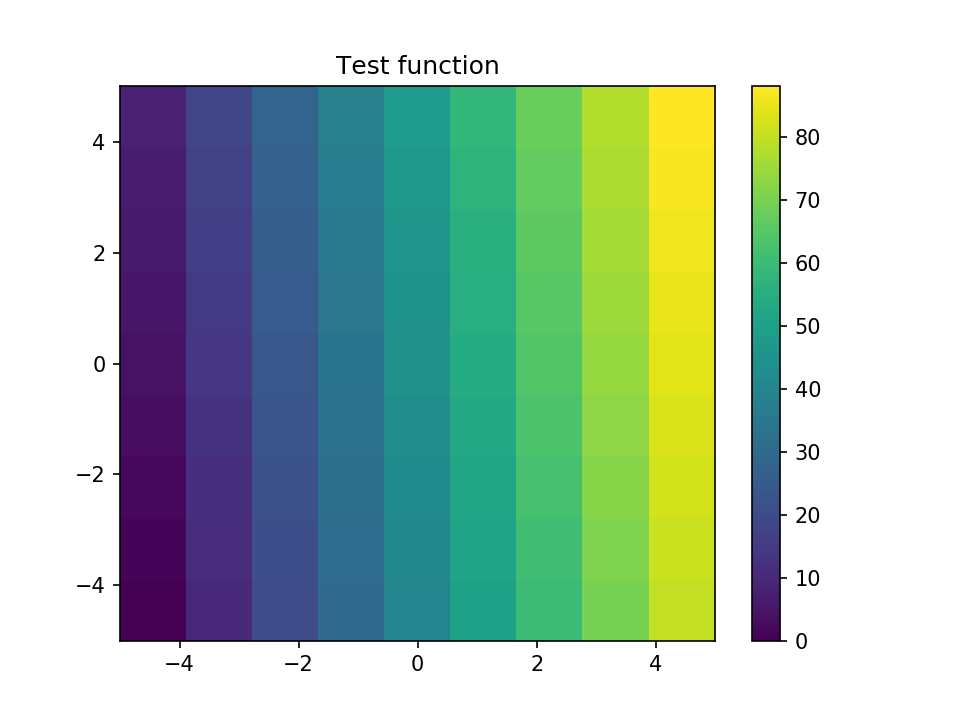

In [4]:
x = np.linspace(-5, 5, 10)
xv, yv = np.meshgrid(x, x, sparse=False, indexing='ij')
x = np.vstack((xv.flatten(), yv.flatten())).transpose()
y = np.arange(0, 100, 1).reshape(10, 10)

plt.figure()
plt.title('Test function')
plt.pcolormesh(xv, yv, y)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


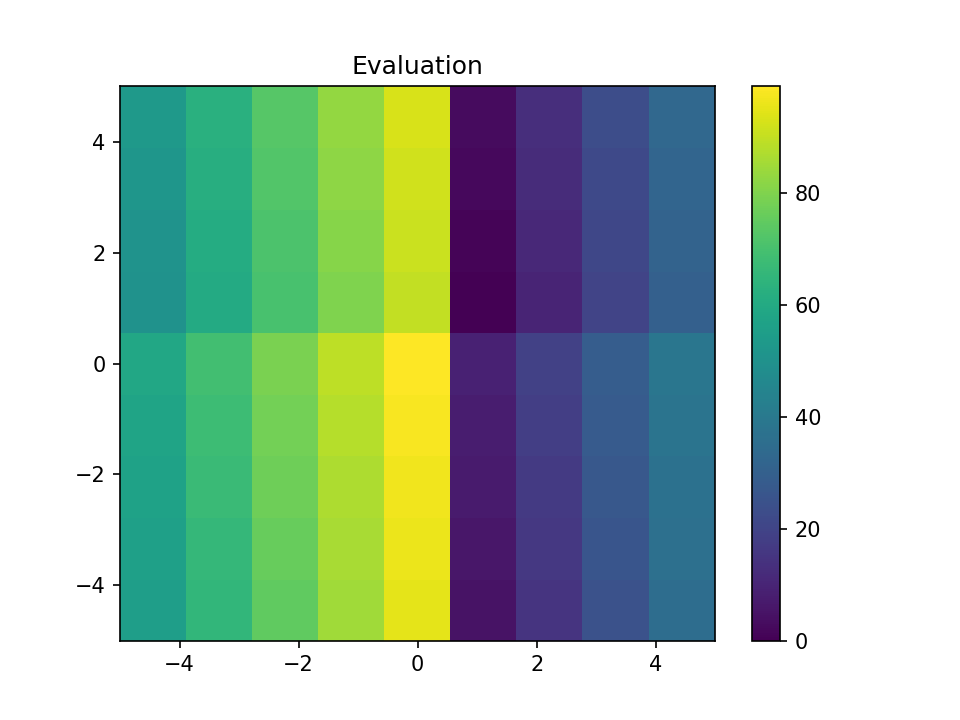

In [5]:
xmins = np.array([-5., -5.])
xmaxs = np.array([5., 5.])
tile_regressor = TileRegressor(xmins, xmaxs, 1, 10)

tile_regressor.fit(x, y.flatten())

y = tile_regressor.f(x)
y = y.reshape(10, 10)


plt.figure()
plt.title('Evaluation')
plt.pcolormesh(xv, yv, y)
plt.colorbar()
plt.show()